# Introduction
Stacking градиентного бустинга с Bernoulli loss,
логистической регрессии, kNN и NaiveBayes

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
from queue import Queue
from collections import deque
from sklearn.ensemble.gradient_boosting import BinomialDeviance
from scipy import stats
from sklearn.utils.validation import check_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, log_loss
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from IPython import get_ipython
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
InteractiveShell.ast_node_interactivity = 'all'

ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
init_notebook_mode(connected=True)
%matplotlib inline
# sklearn

/home/demontego/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.



### import data

In [3]:
data1 = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                    delim_whitespace=True, header=None,
                    names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                           'model', 'origin', 'car_name'])
data1 = data1.dropna()
data1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [4]:
columns1 = ['cylinders', 'displacement', 'horsepower',
            'weight', 'acceleration', 'model', 'origin']
X1 = np.array(data1[columns1])
y1 = np.array(data1['mpg'])
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4)

In [5]:
%%time
tree = DecisionTreeRegressor()
tree.fit(X1_train, y1_train)
mse = mean_squared_error(y1_test, tree.predict(X1_test))
print(mse)

11.957261146496817
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.91 ms


In [6]:
data2 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data",
                    header=None,
                    names=['vendor name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH',
                           'CHMIN', 'CHMAX', 'PRP', 'ERP'])
data2 = data2.dropna()
data2.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [7]:
columns2 = ['MYCT', 'MMIN', 'MMAX', 'CACH',
                            'PRP', 'CHMAX', 'ERP']
X2 = np.array(data2[columns2])
y2 = np.array(data2['CHMIN'])
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1)

In [8]:
%%time
tree = DecisionTreeRegressor()
tree.fit(X2_train, y2_train)
print(tree.predict(X2_test))
mse = mean_squared_error(y2_test, tree.predict(X2_test))
print(mse)

[12.  3.  1.  2.  4.  1. 12. 12.  1.  1.  1.  1. 12.  8.  3.  2.  5.  8.
  6.  1. 12.]
10.80952380952381
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.5 ms


In [9]:
from sklearn.datasets import load_svmlight_file, load_svmlight_file
x_train, y_reg_train = load_svmlight_file("reg.train.txt")
x_reg_train = x_train.toarray()

x_test, y_reg_test = load_svmlight_file("reg.test.txt")
x_reg_test = x_test.toarray()

In [10]:
%%time
tree = DecisionTreeRegressor(max_depth=3, max_features=None)
tree.fit(x_reg_train, y_reg_train)
mse = mean_squared_error(y_reg_test, tree.predict(x_reg_test))
print(mse)

0.8695703931003984
CPU times: user 109 ms, sys: 15.6 ms, total: 125 ms
Wall time: 122 ms


In [11]:
data_train = pd.read_csv("spam_train.csv", header=None, sep=' ')
x_spam_train, y_spam_train = np.array(
    data_train[range(1, 103)]), np.array(data_train[0])

data_test = pd.read_csv("spam_test.csv", header=None, sep=' ')
x_spam_test, y_spam_test = np.array(
    data_test[range(1, 103)]), np.array(data_test[0])

In [12]:
%%time
tree = DecisionTreeClassifier()
tree.fit(x_spam_train, y_spam_train)
f1 = f1_score(y_spam_test, tree.predict(x_spam_test))
print(f1)

0.8591051543642062
CPU times: user 328 ms, sys: 0 ns, total: 328 ms
Wall time: 340 ms


# Analysis/Modeling
Do work here

## MyDecisionTreeClassifier

In [2]:
class MyDecisionTreeClassifier:
    NON_LEAF_TYPE = 0
    LEAF_TYPE = 1

    def __init__(self, min_samples_split=3, max_depth=None, sufficient_share=0.4, criterion='gini', max_features=None):
        self.tree = dict()
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.sufficient_share = sufficient_share
        self.num_class = -1
        self.feature_importances_ = None
        if criterion == 'gini':
            self.G_function = self.__gini
        elif criterion == 'entropy':
            self.G_function = self.__entropy
        elif criterion == 'misclass':
            self.G_function = self.__misclass
        else:
            print('invalid criterion name')
            raise

        if max_features == 'sqrt':
            self.get_feature_ids = self.__get_feature_ids_sqrt
        elif max_features == 'log2':
            self.get_feature_ids = self.__get_feature_ids_log2
        elif max_features == None:
            self.get_feature_ids = self.__get_feature_ids_N
        else:
            print('invalid max_features name')
            raise

    def __gini(self, l_c, l_s, r_c, r_s):
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return 1 - np.sum((l_c ** 2) / (l_s * (l_s + r_s)) + (
            r_c ** 2) / (r_s * (l_s + r_s)), axis=1)

    def __entropy(self, l_c, l_s, r_c, r_s):
        return -np.sum(l_c/l_s*np.log2(1+l_c/l_s), axis=1)-np.sum(r_c/r_s*np.log2(1+r_c/r_s), axis=1)

    def __misclass(self, l_c, l_s, r_c, r_s):
        return 1 - np.max(l_c / (l_s + r_s), axis=1) - np.max(
            r_c / (l_s + r_s), axis=1)

    def __get_feature_ids_sqrt(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return np.array(feature_ids[:int(np.sqrt(n_feature))])

    def __get_feature_ids_log2(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return np.array(feature_ids[:int(np.log2(n_feature))])

    def __get_feature_ids_N(self, n_feature):
        return np.arange(n_feature)

    def __sort_samples(self, x, y):
        sorted_idx = x.argsort()
        return x[sorted_idx], y[sorted_idx]

    def __div_samples(self, x, y, feature_id, threshold):
        left_mask = x[:, feature_id] > threshold
        right_mask = ~left_mask
        return x[left_mask], x[right_mask], y[left_mask], y[right_mask]

    def __find_threshold(self, x, y):
        # Отсортировали x и y с помощью нашей функции
        x_sort, y_sort = self.__sort_samples(x, y)
        # записываем количество классов в class_num
        class_num = self.num_class

        # отсекаем справа и слева куски, по которым точно не пройдет граница.
        # ищем индексы, в которых y меняется, и добавляем смещение cut,
        # чтобы индексы были как в y_sort, записали это в r_border_ids
        cut = np.int(self.min_samples_split / 2 - 1)
        y_sort_slit = y_sort[cut:-cut] if cut != 0 else y_sort
        r_border_ids = np.where(
            y_sort_slit[:-1] != y_sort_slit[1:])[0] + (cut + 1)

        # если же класс не сменяется вообще, то выходим из функции
        if len(r_border_ids) == 0:
            return np.inf, None

        # Формируем массив one_hot_code - каждая строка отвечает
        # за границу, по которой потенциально может пройти разбиение.
        # Столбцы соответствуют классам. В столбце поднята единица,
        # если разбиение прошло по данному классу.
        eq_el_count = r_border_ids - np.append([cut], r_border_ids[:-1])
        one_hot_code = np.zeros((r_border_ids.shape[0], class_num))
        one_hot_code[np.arange(r_border_ids.shape[0]),
                     y_sort[r_border_ids - 1]] = 1

        # В class_increments получаем сколько элементов было в группах
        # включая первые min_samples_split элементов.
        class_increments = one_hot_code * eq_el_count.reshape(-1, 1)
        class_increments[0] = class_increments[0] + \
            np.bincount(y_sort[:cut], minlength=class_num)

        # находим количество классов слева и справа в разбиении
        l_class_count = np.cumsum(class_increments, axis=0)
        r_class_count = np.bincount(
            y_sort, minlength=class_num) - l_class_count

        # а также количество объектов слева и справа в разбиении
        l_sizes = r_border_ids.reshape(l_class_count.shape[0], 1)
        r_sizes = y_sort.shape[0] - l_sizes

        # подсчитываем меру неопределенности и находим под каким индексом лежит минимальное значение этой меры
        gs = self.G_function(l_class_count, l_sizes, r_class_count, r_sizes)
        indx = np.argmin(gs)

        # Получаем индекс left_el_id, после которого проходит разбиение.
        left_el_id = l_sizes[indx][0]

        # Возвращаем неопределенность, и пороговое значение.
        return gs[indx], (x_sort[left_el_id - 1] + x_sort[left_el_id]) / 2.0

    def __fit_node(self, x, y, node_id, depth):
        # создаем листовую вершину, если не достигли конца.
        if (self.max_depth is not None and self.max_depth <= depth) or \
                y.size < self.min_samples_split or \
                self.sufficient_share <= np.bincount(y).argmax() / y.size:
            self.tree[node_id] = (self.LEAF_TYPE, np.bincount(
                y).argmax(), np.bincount(y).astype(float) / y.size)
            return False, [], [], [], []
        # находим группs в выборке
        threshold = np.array([self.__find_threshold(x[:, i], y)
                              for i in self.get_feature_ids(x.shape[1])])

        # находим группу с минимальныыми значениями.
        best_id = threshold[:, 0].argmin()
        best_threshold = threshold[best_id, 1]

        # если узел создался и нашлась группа, то спускаемся по дереву дальше, если нет, то создаем последний лист.
        if best_threshold == None:
            self.tree[node_id] = (self.LEAF_TYPE, np.bincount(
                y).argmax(), np.bincount(y).astype(float) / y.size)
            return False, [], [], [], []
        x_l, x_r, y_l, y_r = self.__div_samples(x, y, best_id, best_threshold)
        if x_l.size == 0 or x_r.size == 0:
            self.tree[node_id] = (self.LEAF_TYPE, np.bincount(
                y).argmax(), np.bincount(y).astype(float) / y.size)
            return False, [], [], [], []
        if self.G_function == self.__gini:
            g = (1 - np.sum(np.unique(y, return_counts=True)
                            [1] ** 2 / y.size ** 2))
            g_l = (1 - np.sum(np.unique(y_l, return_counts=True)
                              [1] ** 2 / y_l.size ** 2))
            g_r = (1 - np.sum(np.unique(y_r, return_counts=True)
                              [1] ** 2 / y_r.size ** 2))
            self.feature_importances_[
                best_id] += y.size*g - y_l.size*g_l - y_r.size*g_r
        if self.G_function == self.__entropy:
            g = -(np.sum((np.unique(y, return_counts=True)
                          [1] / y.size) * np.log2(np.unique(y, return_counts=True)[1] / y.size)))
            g_l = -(np.sum((np.unique(y_l, return_counts=True)[1] / y_l.size) * np.log2(
                np.unique(y_l, return_counts=True)[1] / y_l.size)))
            g_r = -(np.sum((np.unique(y_r, return_counts=True)[1] / y_r.size) * np.log2(
                np.unique(y_r, return_counts=True)[1] / y_r.size)))
            self.feature_importances_[
                best_id] += (y.size*g - y_l.size*g_l - y_r.size*g_r)
        elif self.G_function == self.__misclass:
            g = (
                1 - np.max(np.sum(np.unique(y, return_counts=True)[1] / y.size)))
            g_l = (
                1 - np.max(np.sum(np.unique(y_l, return_counts=True)[1] / y.size)))
            g_r = (
                1 - np.max(np.sum(np.unique(y_r, return_counts=True)[1] / y.size)))
            self.feature_importances_[
                best_id] += (y.size*g - y_l.size*g_l - y_r.size*g_r)
        self.tree[node_id] = (self.NON_LEAF_TYPE, best_id, best_threshold)
        return True, x_l, x_r, y_l, y_r

    def fit(self, x, y):
        self.num_class = np.unique(y).size
        self.feature_importances_ = np.zeros(x.shape[1])
        q = Queue()
        q.put((0, 0, x, y))
        while not q.empty():
            node_id, depth, x, y = q.get()
           # print(node_id, depth)
            check, x_l, x_r, y_l, y_r = self.__fit_node(x, y, node_id, depth)
            if check:
                q.put((2*node_id+1, depth+1, x_l, y_l))
                q.put((2*node_id+2, depth+1, x_r, y_r))
        self.feature_importances_ /= y.size
        return self

    def __predict_class(self, x):
        node_id = 0
        node = self.tree[node_id]
        while node[0] == self.__class__.NON_LEAF_TYPE:
            _, feature_id, threshold = node
            if x[feature_id] > threshold:
                node_id = 2*node_id+1
                node = self.tree[node_id]
            else:
                node_id = 2*node_id+1
                node = self.tree[node_id]
        return node[1]

    def predict(self, X):
        return np.array([self.__predict_class(x) for x in X])

    def fit_predict(self, x_train, y_train, predicted_x):
        self.fit(x_train, y_train)
        return self.predict(predicted_x)

In [3]:
%%time
tree = MyDecisionTreeClassifier()
tree.fit(x_spam_train, y_spam_train)
print(tree.predict(x_spam_train).mean(), y_spam_train.mean())
y_pred = tree.predict(x_spam_test)
f1 = f1_score(y_spam_test, y_pred)
print(f1, y_pred.mean())

NameError: name 'x_spam_train' is not defined

## MyDecisionTreeRegressor

In [4]:
class MyDecisionTreeRegressor:
    NON_LEAF_TYPE = False
    LEAF_TYPE = True

    def __init__(self, min_samples_split=3, max_depth=None, min_impurity_split=1e-7, max_features=None):
        self.tree = dict()
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.min_impurity_split = min_impurity_split

        if max_features == 'sqrt':
            self.get_feature_ids = self.__get_feature_ids_sqrt
        elif max_features == 'log2':
            self.get_feature_ids = self.__get_feature_ids_log2
        elif max_features == None:
            self.get_feature_ids = self.__get_feature_ids_N
        else:
            print('invalid max_features name')
            raise

    def __get_feature_ids_sqrt(self, n_feature):
        feature_ids = np.arange(n_feature)
        np.random.shuffle(feature_ids)
        return np.array(feature_ids[:int(np.sqrt(n_feature))])

    def __get_feature_ids_log2(self, n_feature):
        feature_ids = np.arange(n_feature)
        np.random.shuffle(feature_ids)
        return np.array(feature_ids[:int(np.log2(n_feature))])

    def __get_feature_ids_N(self, n_feature):
        return np.arange(n_feature)

    def __calc_variance(self, y,w):
        if w is not None:
            y = y.astype(np.float64, copy=False)
            w=np.asarray(w)
            y =  (y.T*w.T).T
        N = y.shape[1]
        share_l = np.arange(1, N)
        share_r = N-share_l
        y_sq = y**2

        sum_sq_l = (y_sq[:, :N-1]).cumsum(1)
        sum_sq_r = y_sq.sum(1)[:, None]-sum_sq_l

        mean_sq_l = sum_sq_l/share_l
        mean_sq_r = sum_sq_r/share_r

        sum_l = (y[:, :N-1]).cumsum(1)
        sum_r = (y.sum(1)[:, None])-sum_l

        mean_l = sum_l/share_l
        mean_r = sum_r/share_r

        cum_std_l = mean_sq_l-mean_l**2
        cum_std_r = mean_sq_r-mean_r**2

        variance = (share_l/N)*cum_std_l+(share_r/N)*cum_std_r

        return variance

    def __calc_border_inds(self, x):
        diff = np.abs(np.diff(x, axis=0).T)
        inds = np.argwhere(diff > 1e-5)
        border_inds = []
        for i in range(x.shape[1]):
            ids = inds[inds[:, 0] == i][:, 1]
            if ids.shape[0] == 0:
                ids = np.array([np.inf])
            border_inds.append(ids)
        return border_inds

    def __sort_samples(self, x, y,w, feature_ids):
        sorted_ids = x[:, feature_ids].argsort(axis=0)
        if w is not None:
            return x[sorted_ids, feature_ids], y[sorted_ids].T, w[sorted_ids].T
        else:
            return x[sorted_ids, feature_ids], y[sorted_ids].T, None

    def __find_threshold(self, x, y,w, feature_ids):
        # Отсортировали x и y с помощью нашей функции
        x_sort, y_sort, w_sort = self.__sort_samples(x, y,w, feature_ids)
        border_inds = self.__calc_border_inds(x_sort)
        # print(border_inds[0:5])
        variance = self.__calc_variance(y_sort, w_sort)
        # print(variance)
        min_variance_ind = []
        min_variance_no_ind = []
        for feature_ind, border_ind in enumerate(border_inds):
            if border_ind[0] == np.inf:
                min_variance_ind.append(0)
                min_variance_no_ind.append(len(min_variance_ind)-1)
            else:
                idx = np.argmin(variance[feature_ind, border_ind])
                min_variance_ind.append(border_ind[idx])
        min_variance_ind = np.array(min_variance_ind)
        min_variance_no_ind = np.array(min_variance_no_ind)
        min_variance = variance[np.arange(
            variance.shape[0]), min_variance_ind.ravel()]
        # print(min_variance[0:3],min_variance_ind[0:3],min_variance_no_ind[0:2])
        if min_variance_no_ind.shape[0] > 0:
            min_variance[min_variance_no_ind] = np.inf

        best_split_right_ind = min_variance_ind + 1
        min_variance[best_split_right_ind <= self.min_samples_split] = np.inf
        min_variance[best_split_right_ind >=
                     y_sort.shape[1] - self.min_samples_split] = np.inf
        best_threshold = (x_sort[min_variance_ind, np.arange(x_sort.shape[1])]
                          + x_sort[best_split_right_ind, np.arange(x_sort.shape[1])]) / 2.0
        return min_variance, best_threshold

    def __set_leaf(self, x, y, node_id, w):
        if w is not None:
            y = y.astype(np.float64, copy=False)
            w=np.asarray(w)
            numerator = np.sum(w*y)
            denominator = w.sum()
            if abs(denominator) < 1e-30:
                mean_value =  0
            else:
                mean_value = numerator / denominator
        else:
            mean_value = y.mean()
        #print(y.mean(), mean_value)
        self.tree[node_id] = {'type': self.LEAF_TYPE,
                              'value': mean_value}

    def __is_leaf(self, x, y, depth):
        return x.shape[0] < 2 * self.min_samples_split + 2 or np.unique(y).shape[0] == 1 or \
            self.max_depth is not None and depth >= self.max_depth or \
            self.min_impurity_split is not None and np.mean(
                (y - y.mean()) ** 2) < self.min_impurity_split

    def __div_samples(self, x, y,w, feature_id, threshold):
        left_mask = x[:, feature_id] > threshold
        right_mask = ~left_mask
        if w is not None:
            return x[left_mask], x[right_mask], y[left_mask], y[right_mask], w[left_mask], w[right_mask]
        else:
            return x[left_mask], x[right_mask], y[left_mask], y[right_mask], None, None

    def __fit_node(self, x, y,w, node_id, depth):

        if self.__is_leaf(x, y, depth):
            self.__set_leaf(x, y, node_id,w)
            return False, [], [], [], [], None,None

        feature_ids = self.get_feature_ids(x.shape[1])
        variance, thresholds = self.__find_threshold(x, y,w, feature_ids)
        best_variance_inds = variance.argmin()
        #print(best_variance_inds, variance.min())
        best_variance = variance[best_variance_inds]
        best_id = feature_ids[best_variance_inds]
        best_threshold = thresholds[best_variance_inds]

        if best_variance == np.inf:
            self.__set_leaf(x, y, node_id,w)
            return False, [], [], [], [], None,None
        else:
            x_l, x_r, y_l, y_r, w_l,w_r = self.__div_samples(
                x, y,w, best_id, best_threshold)
            if x_l.shape[0] == 0 or x_r.shape[0] == 0:
                self.__set_leaf(x, y, node_id,w)
                return False, [], [], [], None,None
            else:
                self.tree[node_id] = {'type': self.NON_LEAF_TYPE,
                                      'feature_id': best_id,
                                      'threshold': best_threshold}
        #self.__fit_node(x_l, y_l, 2 * node_id + 1, depth + 1)
        #self.__fit_node(x_r, y_r, 2 * node_id + 2, depth + 1)
                # print(self.tree[node_id])
        return True, x_l, x_r, y_l, y_r, w_l,w_r

    def fit(self, x, y, sample_weight=None):
        if sample_weight is not None:
            self.sample_weight = np.asarray(sample_weight)
        else:
            self.sample_weight=None
        q = Queue()
        q.put((0, 0, x, y, self.sample_weight))
        while not q.empty():
            node_id, depth, x, y, w = q.get()
           # print(node_id, depth)
            check, x_l, x_r, y_l, y_r, w_l,w_r = self.__fit_node(x, y, w , node_id, depth)
            if check:
                q.put((2*node_id+1, depth+1, x_l, y_l,w_l))
                q.put((2*node_id+2, depth+1, x_r, y_r,w_r))
        # self.__fit_node(x,y,0,0)
        return self

    def __predict_value(self, x):
        node_id = 0
        node = self.tree[node_id]
        while node['type'] == self.NON_LEAF_TYPE:
            feature_id, threshold = node['feature_id'], node['threshold']
            if x[feature_id] > threshold:
                node_id = 2*node_id+1
            else:
                node_id = 2*node_id+2
            node = self.tree[node_id]
        return node['value']

    def predict(self, X):
        return np.array([self.__predict_value(x) for x in X])

    def fit_predict(self, x_train, y_train, predicted_x):
        self.fit(x_train, y_train)
        return self.predict(predicted_x)

In [314]:
%%time
tree = MyDecisionTreeRegressor(max_depth=3)
tree.fit(x_reg_train, y_reg_train)
y_pred = tree.predict(x_reg_test)
mse = mean_squared_error(y_reg_test, y_pred)
print(mse)

0.8694458133509975
CPU times: user 594 ms, sys: 0 ns, total: 594 ms
Wall time: 586 ms


## MyGradientBoosting

In [5]:
from scipy.special import expit
alt_dev = lambda y, pred: np.mean(np.logaddexp(0.0, -2.0 * (2.0 * y - 1) * pred))

In [6]:
class MyGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, weight_trim_quantile=0.05, max_features=None,
                 min_samples_split=3, min_impurity_split=1e-7, base_tree=MyDecisionTreeRegressor):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.weight_trim_quantile = weight_trim_quantile
        self.learning_rate = learning_rate
        self.min_impurity_split = min_impurity_split
        self.loss_by_iter = []
        self.trees_ = [None] * self.n_estimators
        self.min_samples_split = min_samples_split
        self.base_tree = base_tree

    def _decision_function(self, X):
        scores = [estimator.predict(X) for estimator in self.trees_]
        scores = np.sum(scores, axis=0)
        return scores

    def _loss(self, y, pred, sample_weight):
        # return np.mean(np.logaddexp(0.0, -2.0 * (2.0 * y - 1) * pred))
        # return bd(y,pred, sample_weight)
        if sample_weight is not None:
            return -2.0 * np.mean((y * pred) - np.logaddexp(0.0, pred))
        else:
            return bd(y,pred, sample_weight)
            return (-2.0 / sample_weight.sum() *
                    np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))

    def fit(self, X, y):
        self.classes_, y = np.unique(y, return_inverse=True)
        p = np.full(shape=X.shape[0], fill_value=0.5, dtype=np.float64)
        scores = np.zeros(X.shape[0], dtype=np.float64)
        for i in range(self.n_estimators):
            sample_weight, z = self._weights_and_response(y, p)
            threshold = np.quantile(
                sample_weight, self.weight_trim_quantile, interpolation="lower")
            mask = (sample_weight >= threshold)
            X_train = X[mask]
            z_train = z[mask]
            sample_weight = sample_weight[mask]
            kwargs = dict(sample_weight=sample_weight)
            self.trees_[i] = self.base_tree(
                max_depth=self.max_depth, min_samples_split=self.min_samples_split).fit(X_train, z_train, **kwargs)
            new_scores = self.trees_[i].predict(X)
            scores += self.learning_rate * new_scores
            self.loss_by_iter.append(self._loss(y[mask], scores[mask], **kwargs))
            p = expit(scores)
        pass
    
    
    def _weights_and_response(self, y, prob):
        sample_weight = prob * (1. - prob)
        sample_weight = np.maximum(
            sample_weight, 2. * np.finfo(np.float64).eps)
        with np.errstate(divide='ignore', over='ignore'):
            z = np.where(y, 1. / prob, -1. / (1. - prob))
        return sample_weight, z

    def predict(self, X, y_true=None):
        scores = self._decision_function(X)
        indices = (scores >= 0).astype(np.int_)
        return self.classes_.take(indices, axis=0)

In [7]:
N_ESTIMATORS = 100

In [319]:
%%time
my_model_1 = MyGradientBoosting(learning_rate=0.1, n_estimators=N_ESTIMATORS, max_depth=3,
                                       base_tree=MyDecisionTreeRegressor)
my_model_1.fit(x_spam_train,y_spam_train)
y_pred=my_model_1.predict(x_spam_test)
bd_my_model_my_tree=alt_dev(y_spam_test,y_pred)
print(bd_my_model_my_tree)

0.2897731559686864
CPU times: user 4min 8s, sys: 125 ms, total: 4min 8s
Wall time: 4min 9s


In [66]:
%%time
my_model_2 = MyGradientBoosting(learning_rate=0.1, n_estimators=N_ESTIMATORS, max_depth=3,  
                                       base_tree=DecisionTreeRegressor)
my_model_2.fit(X_train.toarray(),y_train)
y_pred=my_model_2.predict(X_test.toarray())

CPU times: user 22min 11s, sys: 6min 45s, total: 28min 57s
Wall time: 32min 39s


## NotMyGradientBoosting

In [30]:
%%time

base_model = GradientBoostingClassifier(loss='deviance', n_estimators=N_ESTIMATORS, max_depth=3)
base_model.fit(X_train.toarray(),y_train)
y_pred=base_model.predict(X_test.toarray())

CPU times: user 15min 22s, sys: 5.17 s, total: 15min 27s
Wall time: 15min 36s


## Stacking

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [51]:
class DjStacking:
    """Стэкинг моделей scikit-learn"""

    def __init__(self, models, ens_model):
        """
        Инициализация
        models - базовые модели для стекинга
        ens_model - мета-модель
        """
        self.models = models
        self.ens_model = ens_model
        self.n = len(models)
        self.valid = None
        self.norm = StandardScaler()

    def fit(self, X, y=None, cv=129):
        X_norm = self.norm.fit_transform(X)
        x_pred=[None]*cv
        y_pred=[None]*cv
        y_meta=[None]*cv
        x_meta = np.zeros((X.shape[0], self.n))
        s=X.shape[0]//cv+1
        for i in range(cv):
            x_pred[i],y_pred[i]=X[i*s:(i+1)*s], y[i*s:(i+1)*s]
        for k,model in enumerate(self.models):
            for i in range(cv):
                x_train, y_train=np.concatenate([x_pred[j] for j in range(cv) if j!=i]), np.concatenate([y_pred[j] for j in range(cv) if j!=i])
                model.fit(x_train,y_train)
                y_meta[i]=model.predict(x_pred[i])
                #print(y_meta[i].shape)
            x_meta[:,k]=np.concatenate(y_meta)
        x_meta = np.hstack((x_meta, X_norm))
        self.ens_model.fit(x_meta, y)
        pass

    def predict(self, X, y=None):
        """
        Работа стэкинга
        """
        X_norm = self.norm.transform(X)
        # заполение матрицы для мета-классификатора
        X_meta = np.zeros((X.shape[0], self.n))

        for t, clf in enumerate(self.models):
            X_meta[:, t] = clf.predict(X_norm)
        X_meta = np.hstack((X_meta, X_norm))
        a = self.ens_model.predict(X_meta)

        return a

In [49]:
knn1_r = KNeighborsRegressor(n_neighbors=3)
knn2_r = KNeighborsRegressor(n_neighbors=10)
log1 = LogisticRegression(max_iter=1000)
knn1_c = KNeighborsClassifier(n_neighbors=3)
knn2_c = KNeighborsClassifier(n_neighbors=10)
nb = GaussianNB()
models = [knn2_c, knn2_r, log1, nb, knn1_c,knn2_c]

In [50]:
ens_model_1 = MyGradientBoosting(learning_rate=0.1, n_estimators=N_ESTIMATORS, max_depth=3,
                                 base_tree=DecisionTreeRegressor)
s1 = DjStacking(models, ens_model_1)
s1.fit(X_train.toarray(), y_train)
y_pred = s1.predict(X_test.toarray())

In [52]:
y_pred.shape

(180,)

In [ ]:
ens_model_2 = MyGradientBoosting(learning_rate=0.1, n_estimators=N_ESTIMATORS, max_depth=3,
                                 base_tree=MyDecisionTreeRegressor)
s2 = DjStacking(models, ens_model_2)
s2.fit(X_train.toarray(), y_train)
y_pred2 = s2.predict(X_test.toarray())

# Results
Show graphs and stats here

In [327]:
InteractiveShell.ast_node_interactivity = 'last_expr'

In [328]:
N_ESTIMATORS=100

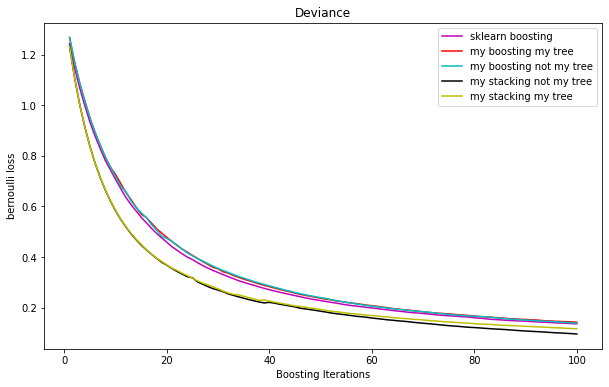

In [329]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.title('Deviance')
plt.plot(np.arange(N_ESTIMATORS) + 1, base_model.train_score_[:N_ESTIMATORS],
         'm-', label='sklearn boosting')
plt.plot(np.arange(N_ESTIMATORS) + 1,
         my_model_1.loss_by_iter[:N_ESTIMATORS], 'r-', label='my boosting my tree')
plt.plot(np.arange(N_ESTIMATORS) + 1,
         my_model_2.loss_by_iter[:N_ESTIMATORS], 'c-', label='my boosting not my tree')
plt.plot(np.arange(N_ESTIMATORS) + 1,
         ens_model_1.loss_by_iter[:N_ESTIMATORS], 'k-', label='my stacking not my tree')
plt.plot(np.arange(N_ESTIMATORS) + 1,
         ens_model_2.loss_by_iter[:N_ESTIMATORS], 'y-', label='my stacking my tree')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('bernoulli loss')
plt.show()

In [330]:
N_ESTIMATORS=200

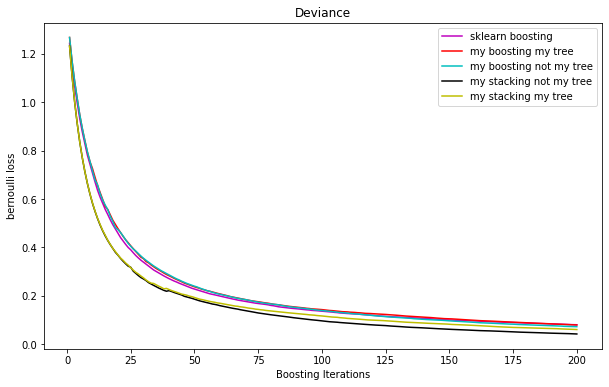

In [331]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.title('Deviance')
plt.plot(np.arange(N_ESTIMATORS) + 1, base_model.train_score_[:N_ESTIMATORS],
         'm-', label='sklearn boosting')
plt.plot(np.arange(N_ESTIMATORS) + 1,
         my_model_1.loss_by_iter[:N_ESTIMATORS], 'r-', label='my boosting my tree')
plt.plot(np.arange(N_ESTIMATORS) + 1,
         my_model_2.loss_by_iter[:N_ESTIMATORS], 'c-', label='my boosting not my tree')
plt.plot(np.arange(N_ESTIMATORS) + 1,
         ens_model_1.loss_by_iter[:N_ESTIMATORS], 'k-', label='my stacking not my tree')
plt.plot(np.arange(N_ESTIMATORS) + 1,
         ens_model_2.loss_by_iter[:N_ESTIMATORS], 'y-', label='my stacking my tree')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('bernoulli loss')
plt.show()

In [332]:
N_ESTIMATORS=500

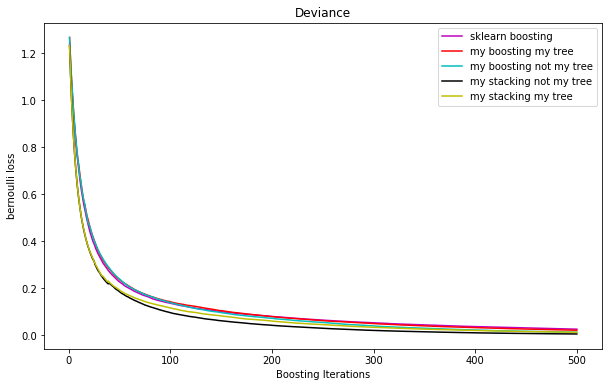

In [333]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.title('Deviance')
plt.plot(np.arange(N_ESTIMATORS) + 1, base_model.train_score_[:N_ESTIMATORS],
         'm-', label='sklearn boosting')
plt.plot(np.arange(N_ESTIMATORS) + 1,
         my_model_1.loss_by_iter[:N_ESTIMATORS], 'r-', label='my boosting my tree')
plt.plot(np.arange(N_ESTIMATORS) + 1,
         my_model_2.loss_by_iter[:N_ESTIMATORS], 'c-', label='my boosting not my tree')
plt.plot(np.arange(N_ESTIMATORS) + 1,
         ens_model_1.loss_by_iter[:N_ESTIMATORS], 'k-', label='my stacking not my tree')
plt.plot(np.arange(N_ESTIMATORS) + 1,
         ens_model_2.loss_by_iter[:N_ESTIMATORS], 'y-', label='my stacking my tree')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('bernoulli loss')
plt.show()

In [334]:
N_ESTIMATORS=1000

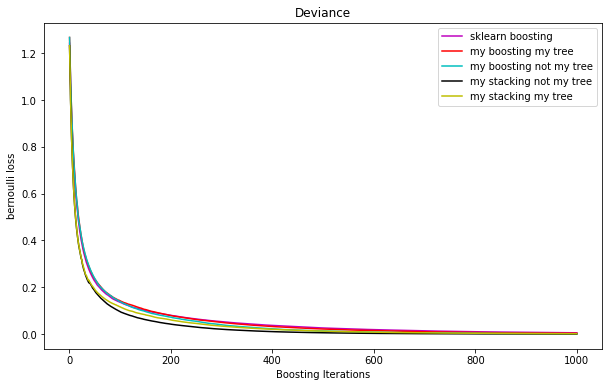

In [335]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.title('Deviance')
plt.plot(np.arange(N_ESTIMATORS) + 1, base_model.train_score_[:N_ESTIMATORS],
         'm-', label='sklearn boosting')
plt.plot(np.arange(N_ESTIMATORS) + 1,
         my_model_1.loss_by_iter[:N_ESTIMATORS], 'r-', label='my boosting my tree')
plt.plot(np.arange(N_ESTIMATORS) + 1,
         my_model_2.loss_by_iter[:N_ESTIMATORS], 'c-', label='my boosting not my tree')
plt.plot(np.arange(N_ESTIMATORS) + 1,
         ens_model_1.loss_by_iter[:N_ESTIMATORS], 'k-', label='my stacking not my tree')
plt.plot(np.arange(N_ESTIMATORS) + 1,
         ens_model_2.loss_by_iter[:N_ESTIMATORS], 'y-', label='my stacking my tree')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('bernoulli loss')
plt.show()

# Conclusions and Next Steps
Summarize findings here

In [8]:
import shutil
import sys
doc_to_title = {}
with open('docs_titles.tsv',encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))

28026


In [9]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [10]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    pair_id = new_doc['pair_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title, pair_id))

In [42]:
def generator(docs):
    for i in docs:
        for j in docs[i]:
            yield j[2]

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(generator(traingroups_titledata))

In [17]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [25]:
X_test=vectorizer.transform(generator(testgroups_titledata))

(16627, 22717)

In [28]:
y_train = list(generator(traingroups_titledata))

In [43]:
doc_id=list(generator(testgroups_titledata))

In [18]:
morph.normal_forms(traingroups_titledata[1][1][1])

['ваз 2107 оптом в сочи. сравнить цены, купить потребительские товары на tiu.ru']

In [45]:
file = open("out_new_kr3.csv", "wb")
file.write( bytes(str("pair_id,target\n"), "utf-8"))
for k,pair_id in enumerate(doc_id):
    file.write(bytes(str(pair_id) + "," +str(y_pred[k]) + str("\n"), "utf-8"))
file.close()

15

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

8

In [38]:
idx=np.argsort(doc_id)
doc_id_=np.array(doc_id)[idx]

In [ ]:
doc_id